**Student Grade Prediction**

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
!unzip '/content/archive (18).zip' #unzip

Archive:  /content/archive (18).zip
replace mat2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data=pd.read_csv('/content/mat2.csv')

In [ ]:
data.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
data['G3'].describe( )

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

<ipython-input-92-cc464fd8d3f4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  b=sns.distplot(data['G3'])


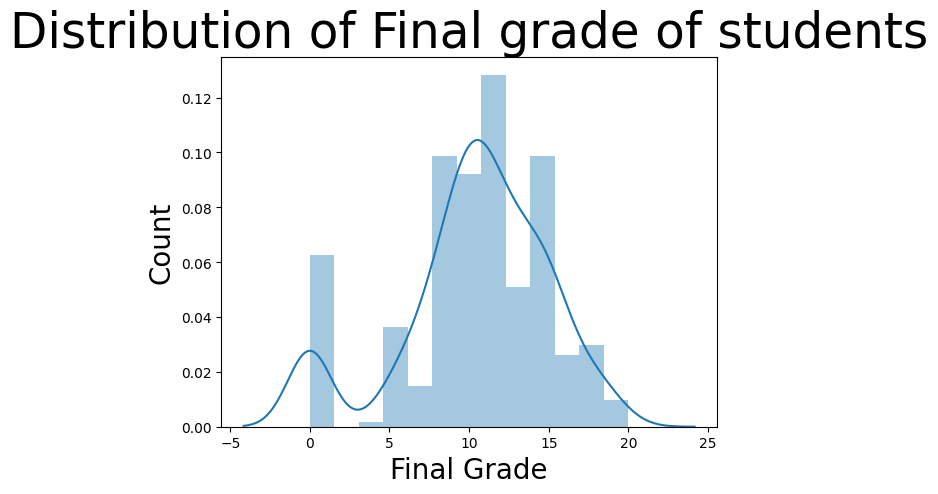

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
b=sns.distplot(data['G3'])
b.axes.set_title('Distribution of Final grade of students',fontsize=35)
b.set_xlabel('Final Grade',fontsize=20)
b.set_ylabel('Count',fontsize=20)
plt.show()

In [ ]:
data.columns

Index(['Unnamed: 0', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'GradeAvg'],
      dtype='object')

In [ ]:
data.shape

(395, 33)

Missing Value Analysis

In [ ]:
data.isnull().any()

Unnamed: 0    False
sex           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
GradeAvg      False
dtype: bool

No missing values

In [ ]:
male_stud = len(data[data['sex']=='M'])
female_stud=len(data[data['sex']=='F'])
print(male_stud)
print(female_stud)

0
0


In [ ]:
 data['GradeAvg']=(data['G1']+data['G2']+data['G3'])/3

In [ ]:
 data.drop(["school","age"],axis=1,inplace=True)

In [ ]:
data.head()

,Unnamed: 0,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg
0,0,0,1,0,0,4,4,0,4,0,...,3,4,1,1,3,6,5,6,6,5.666667
1,1,0,1,0,1,1,1,0,2,0,...,3,3,1,1,3,4,5,5,6,5.333333
2,2,0,1,1,1,1,1,0,2,2,...,3,2,2,3,3,10,7,8,10,8.333333
3,3,0,1,0,1,4,2,1,3,1,...,2,2,1,1,5,2,15,14,15,14.666667
4,4,0,1,0,1,3,3,2,2,1,...,3,2,1,2,5,4,6,10,10,8.666667


In [ ]:
data.columns

Index(['Unnamed: 0', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'GradeAvg'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
def encode(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=='object':
       data[i]=le.fit_transform(data[i])
  return(data)

In [ ]:
encode(data)

,Unnamed: 0,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg
0,0,0,1,0,0,4,4,0,4,0,...,3,4,1,1,3,6,5,6,6,5.666667
1,1,0,1,0,1,1,1,0,2,0,...,3,3,1,1,3,4,5,5,6,5.333333
2,2,0,1,1,1,1,1,0,2,2,...,3,2,2,3,3,10,7,8,10,8.333333
3,3,0,1,0,1,4,2,1,3,1,...,2,2,1,1,5,2,15,14,15,14.666667
4,4,0,1,0,1,3,3,2,2,1,...,3,2,1,2,5,4,6,10,10,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,1,1,1,0,2,2,3,3,0,...,5,4,4,5,4,11,9,9,9,9.000000
391,391,1,1,1,1,3,1,3,3,0,...,4,5,3,4,2,3,14,16,16,15.333333
392,392,1,0,0,1,1,1,2,2,0,...,5,3,3,3,3,3,10,8,7,8.333333
393,393,1,0,1,1,3,2,3,2,0,...,4,1,3,4,5,0,11,12,10,11.000000


In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
x=data.drop('G3',axis=1)
y=data['G3']

In [ ]:
data['G3']

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [ ]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(r2_score(y_test,y_pred))

1.0
